# MNIST omega|ml tutorial

Modified from the [scikit learn tutorial](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-download-auto-examples-classification-plot-digits-classification-py)

## Import the relevant libraries

In [1]:
import matplotlib.pyplot as plt

# Import the mnist dataset
# https://github.com/datapythonista/mnist
import mnist

# Import classifiers and performance metrics
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

import omegaml as ml

## Load the data

In [2]:
# The mnist dataset originally 28x18
images = mnist.train_images()
images.shape

(60000, 28, 28)

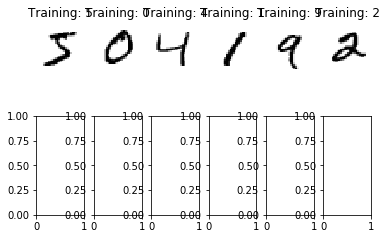

In [3]:
_, axes = plt.subplots(2, 6)
images_and_labels = list(zip(mnist.train_images(), mnist.train_labels()))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:6]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [4]:
mnist.train_labels()[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [5]:
# Flattening the images
full_data = images.reshape((images.shape[0], -1))
full_data.shape

(60000, 784)

In [7]:
# I use only part of the dataset

row_number = 60000

In [8]:
assert row_number<= min(full_data.shape[0], mnist.train_labels().shape[0]), 'The number of rows wanted is greater than the size of the full dataset.'

# data
data = full_data[:row_number, :]
data = data/255 # Normalising. https://aigeekprogrammer.com/keras-python-mnist-handwritten-digit-recognition/

# train_labels
full_train_labels = mnist.train_labels()
train_labels = full_train_labels[:row_number]

In [9]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, train_labels, test_size=0.2, shuffle=False)

## Store the data on omega|ml

In [10]:
om.datasets.put(X_train, 'flatten_digits')

<Metadata: Metadata(name=flatten_digits,bucket=omegaml,prefix=data/,kind=ndarray.bin,created=2020-09-24 13:28:03.078000)>

In [11]:
data = om.datasets.get('flatten_digits')

In [12]:
om.datasets.put(X_train, 'flatten_digits')
om.datasets.put(y_train, 'targets')

<Metadata: Metadata(name=targets,bucket=omegaml,prefix=data/,kind=ndarray.bin,created=2020-09-25 07:57:56.915000)>

In [13]:
om.datasets.list()

['X_test',
 'flatten_digits',
 'flatten_image',
 'flatten_test',
 'np_input',
 'stream-classifier_new',
 'stream-classifier_om',
 'stream-classifier_skl',
 'stream-mnist-test',
 'targets',
 'train_images']

In [14]:
# Create a classifier: a support vector classifier
classifier_om = svm.SVC(gamma=0.001)

In [16]:
# Publishing the model
om.models.put(classifier_om, 'classifier_60000')

<Metadata: Metadata(name=classifier_60000,bucket=omegaml,prefix=models/,kind=sklearn.joblib,created=2021-01-11 08:18:29.049000)>

In [23]:
# Train on the model
om.runtime.model('classifier_60000').fit('flatten_digits', 'targets').get()
# om.runtime.model('classifier_60000').fit('flatten_digits', 'targets')

'<Metadata: Metadata(name=classifier_60000,bucket=omegaml,prefix=models/,kind=sklearn.joblib,created=2021-01-11 08:18:29.049000)>'

In [24]:
# Check that the model is stored in omega|ml
om.models.list()

['classifier_15000', 'classifier_60000', 'cnn_TF']

## Testing the model

In [25]:
om.datasets.put(X_test, 'X_test')
predicted = om.runtime.model('classifier_60000').predict('X_test').get()
predicted.shape

(12000,)

In [26]:
# Fetch the model from omega|ml
classifier_om_test = om.models.get('classifier_60000')

In [41]:
om.models.list()

['classifier_15000', 'classifier_60000', 'cnn_TF', 'cnn_TensorFlow']

In [27]:
# Metrics
print("Classification report for classifier %s:\n%s\n"
      % (classifier_om_test, metrics.classification_report(y_test, predicted)))
# disp = metrics.plot_confusion_matrix(classifier_om_test, X_test, y_test)
# disp.figure_.suptitle("Confusion Matrix")
# print("Confusion matrix:\n%s" % disp.confusion_matrix)
# plt.show()

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1194
           1       0.95      0.98      0.96      1272
           2       0.93      0.92      0.93      1196
           3       0.93      0.91      0.92      1242
           4       0.93      0.95      0.94      1187
           5       0.91      0.91      0.91      1097
           6       0.95      0.98      0.96      1170
           7       0.96      0.94      0.95      1297
           8       0.93      0.90      0.91      1198
           9       0.92      0.91      0.91      1147

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000




In [ ]:
om.datasets.list()

## Testing on a single instance

In [28]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

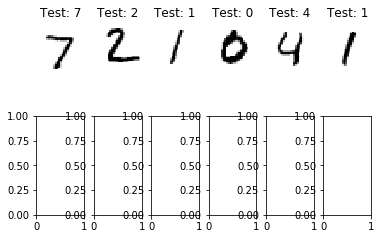

In [29]:
_, axes = plt.subplots(2, 6)
images_and_labels = list(zip(test_images, test_labels))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:6]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Test: %i' % label)

In [30]:
full_test = test_images.reshape((test_images.shape[0], -1))
full_test.shape

(10000, 784)

In [31]:
import random
n = random.randint(0,full_test.shape[0])

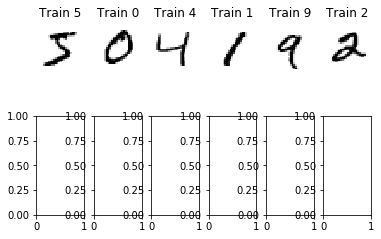

In [32]:
_, axes = plt.subplots(2, 6)
images_and_labels = list(zip(mnist.train_images(), mnist.train_labels()))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:6]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Train %i' % label)

*All in one*

Instance from the mnist.test_images() on row 4921
Expected: 7
Predicted: 7


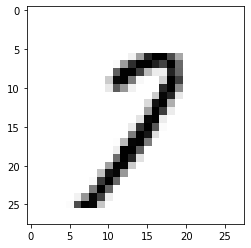

In [38]:
n = random.randint(0,full_test.shape[0])
test_image = test_images[n]

flatten_test = test_image.reshape(1, -1)/255 # Do not forget to normalize !
om.datasets.put(flatten_test, 'flatten_test')
predicted = om.runtime.model('classifier_60000').predict('flatten_test').get()

plt.imshow(test_image, cmap=plt.cm.gray_r, interpolation='nearest')
print('Instance from the mnist.test_images() on row %i' %n)
print('Expected: %i' % test_labels[n])
print('Predicted: %i' % predicted)

## Test on a mask instance from the Flask app

In [ ]:
help('omegaml.mixins.mdf.iotools') 

In [ ]:
import os
os.getcwd()

In [ ]:
raw_input = om.datasets.get('np_input')

In [ ]:
plt.imshow(raw_input, cmap=plt.cm.gray_r, interpolation='nearest')

In [ ]:
# Crop the np array
magnif = 8
input_size = 28
canvas_width = magnif*input_size

# Crop the input to discard the extra pixels added to get a 500x500 array
raw_input = raw_input[:canvas_width, :canvas_width]
raw_input.shape

In [ ]:
plt.imshow(raw_input, cmap=plt.cm.gray_r, interpolation='nearest')

In [ ]:
# https://scipython.com/blog/binning-a-2d-array-in-numpy/
def rebin(arr, new_shape):
    """Rebin 2D array arr to shape new_shape by averaging."""
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)

In [ ]:
processed_input = rebin(raw_input, (input_size, input_size))
plt.imshow(processed_input, cmap=plt.cm.gray_r, interpolation='nearest')

In [ ]:
flatten_test = processed_input.reshape(1, -1) # No need to normalize since it was already

om.datasets.put(flatten_test, 'flatten_test')
predicted = om.runtime.model('classifier_om').predict('flatten_test').get()

plt.imshow(processed_input, cmap=plt.cm.gray_r, interpolation='nearest')
print('Predicted: %i' % predicted)

In [ ]:
# All in one: Test on a mask instance from the Flask app

# Retrieve the data
raw_input = om.datasets.get('np_input')
# Crop the np array
magnif = 8 # Must be an integer
input_size = 28
canvas_width = magnif*input_size

# Pre-processing: size reduction and flattening
raw_input = raw_input[:canvas_width, :canvas_width] # Crop the input to discard the extra pixels added to get a 500x500 array
processed_input = rebin(raw_input, (input_size, input_size))
flatten_test = processed_input.reshape(1, -1) # No need to normalize since it was already

# Predict
om.datasets.put(flatten_test, 'flatten_test')
predicted = om.runtime.model('classifier_om').predict('flatten_test').get()

# Show results
plt.imshow(processed_input, cmap=plt.cm.gray_r, interpolation='nearest')
print('Predicted: %i' % predicted)

In [ ]:
om.datasets.list()

In [ ]:
om.datasets.drop('np_input')